In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime

from google.colab import files
uploaded = files.upload()

Saving states.csv to states.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['states.csv']), parse_dates=['Date'], index_col=['Date'])
df.head()

,State,Confirmed,Recovered,Deceased,Other,Tested
Date,,,,,,
2020-01-30,Kerala,1,0,0,0,NaN
2020-01-30,India,1,0,0,0,NaN
2020-02-02,Kerala,2,0,0,0,NaN
2020-02-02,India,2,0,0,0,NaN
2020-02-03,Kerala,3,0,0,0,NaN


In [ ]:
df_Kerala = df.loc[df['State'] == "Kerala"]
print(df_Kerala)
df_Kerala.to_csv('kerala.csv')

             State  Confirmed  Recovered  Deceased  Other      Tested
Date                                                                 
2020-01-30  Kerala          1          0         0      0         NaN
2020-02-02  Kerala          2          0         0      0         NaN
2020-02-03  Kerala          3          0         0      0         NaN
2020-02-14  Kerala          3          3         0      0         NaN
2020-03-02  Kerala          3          3         0      0         NaN
...            ...        ...        ...       ...    ...         ...
2021-10-27  Kerala    4938603    4831468     29977    529  37602787.0
2021-10-28  Kerala    4946341    4836928     30685    529  37678830.0
2021-10-29  Kerala    4954063    4843576     31156    529  37750511.0
2021-10-30  Kerala    4961490    4850742     31514    529  37821220.0
2021-10-31  Kerala    4968657    4857181     31681    529  37886378.0

[613 rows x 6 columns]


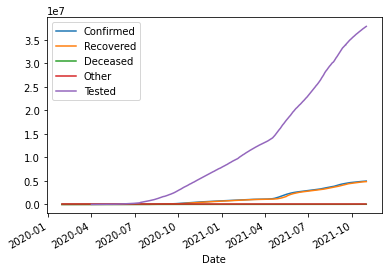

In [ ]:
df_Kerala.plot()

In [ ]:
df_Kerala_confirmed = df_Kerala["Confirmed"]
print(df_Kerala_confirmed)

Date
2020-01-30          1
2020-02-02          2
2020-02-03          3
2020-02-14          3
2020-03-02          3
               ...   
2021-10-27    4938603
2021-10-28    4946341
2021-10-29    4954063
2021-10-30    4961490
2021-10-31    4968657
Name: Confirmed, Length: 613, dtype: int64


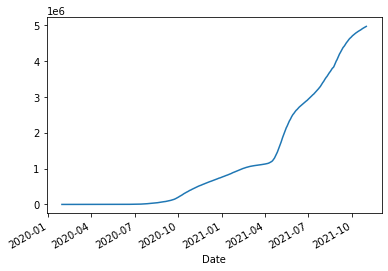

In [ ]:
df_Kerala_confirmed.plot()

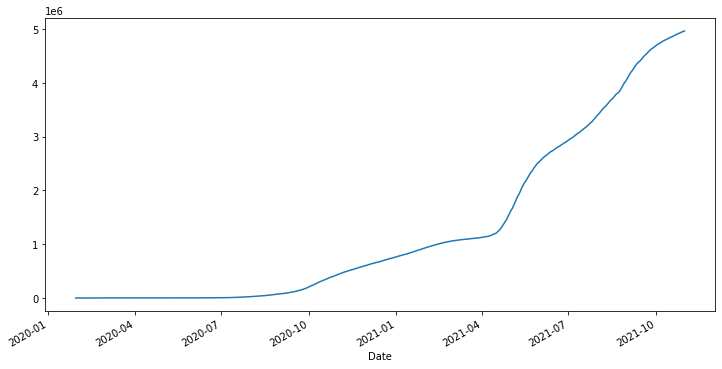

In [ ]:
df_Kerala_confirmed.plot(x='Date', y='Confirmed',figsize=(12, 6))

In [ ]:
# Check missing dates
missing_dates = pd.date_range(df_Kerala_confirmed.index.min(), df_Kerala_confirmed.index.max()).difference(df_Kerala_confirmed.index)
print(missing_dates)
print("Count missing {}".format(len(missing_dates)))
# Add missing dates 
# df_Kerala_confirmed_fill = df_Kerala_confirmed.resample('D').ffill().reset_index()
df_Kerala_confirmed_fill = df_Kerala_confirmed
df_Kerala_confirmed_fill = df_Kerala_confirmed_fill.resample('1D').ffill()
df_Kerala_confirmed_fill = df_Kerala_confirmed_fill.fillna(df_Kerala_confirmed_fill)
print(df_Kerala_confirmed_fill)

# df_Kerala_confirmed_fill.to_csv('Kerala_confirmed_fill.csv')
#RE-check missing
missing_dates = pd.date_range(df_Kerala_confirmed_fill.index.min(), df_Kerala_confirmed_fill.index.max()).difference(df_Kerala_confirmed_fill.index)
print(missing_dates)
print("After Fill Count missing {} Min Date {} Max Date {}".format(len(missing_dates), df_Kerala_confirmed_fill.index.min(), df_Kerala_confirmed_fill.index.max()))

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01'],
              dtype='datetime64[ns]', freq=None)
Count missing 28
Date
2020-01-30          1
2020-01-31          1
2020-02-01          1
2020-02-02          2
2020-02-03          3
               ...   
2021-10-27    4938603
2021-10-28    4946341
2021-10-29    4954063
2021-10-30    4961490
2021-10-31    4968657
Freq: D, Name: Confirmed, Length: 641, dtype: int64
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
After Fill Count missing 0 Min Date 2020-01-30 00:00:00 Max Date 2021-10-31 00:00:00

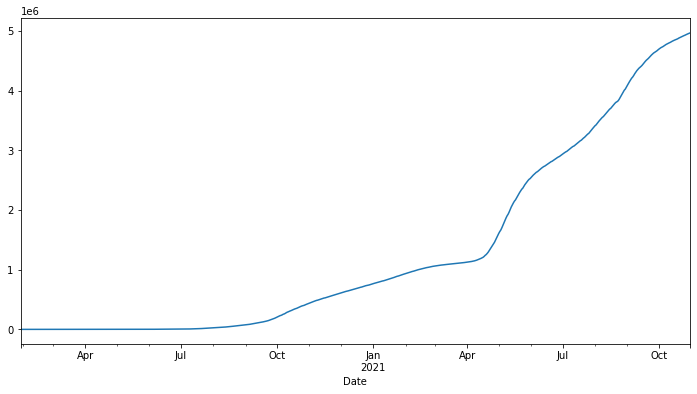

In [ ]:
df_Kerala_confirmed_fill.plot(x='Date', y='Confirmed',figsize=(12, 6))

Date
2020-01-30          1
2020-01-31          1
2020-02-01          1
2020-02-02          2
2020-02-03          3
               ...   
2021-10-27    4938603
2021-10-28    4946341
2021-10-29    4954063
2021-10-30    4961490
2021-10-31    4968657
Freq: D, Name: Confirmed, Length: 641, dtype: int64


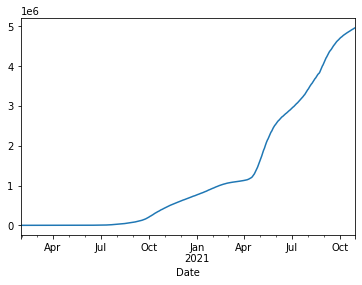

In [ ]:
df_Kerala_confirmed_interpolate = df_Kerala_confirmed_fill.interpolate()
print(df_Kerala_confirmed_interpolate)
df_Kerala_confirmed_interpolate.plot()

In [ ]:
print(df_Kerala_confirmed_fill.shape)
train=df_Kerala_confirmed_fill.iloc[:-120]
test=df_Kerala_confirmed_fill.iloc[-120:]
print(train.shape,test.shape)

(641,)
(521,) (120,)


In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_Kerala_confirmed_fill, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=11684.553, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11764.823, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11748.916, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=11726.304, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=11685.484, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=11682.816, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=11699.335, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=11699.360, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=11684.808, Time=0.27 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=11694.272, Time=0.07 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=11691.720, Time=0.23 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=11684.786, Time=0.22 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 1.779 seconds


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(2,2,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  521
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -4641.546
Date:                Mon, 24 Jan 2022   AIC                           9291.091
Time:                        05:24:28   BIC                           9308.099
Sample:                    01-30-2020   HQIC                          9297.754
                         - 07-03-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1334      0.067      1.977      0.048       0.001       0.266
ar.L2         -0.2334      0.031     -7.441      0.000      -0.295      -0.172
ma.L1         -0.3979      0.066     -6.030      0.000      -0.527      -0.269
sigma2      3.475e+06   9.09e+04     38.224      0.000     3.3e+06    3.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2109.61
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):            5092.72   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

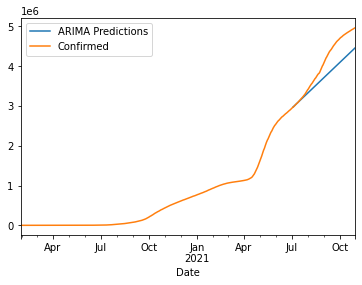

In [ ]:
start=len(train)
end=len(train)+len(test)-1
# ask to predict the test values
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
df_Kerala_confirmed_fill.plot(legend=True)